# 전복 데이터의 분류 모델을 사전 훈련 및 미세 조정을 통해 회귀 모델로 변환

In [12]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [82]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

# 전복 데이터 불러오기 
df = pd.read_csv("C:/Users/tansy/Ai/abalone.csv", index_col=0)

In [78]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


<span style="font-size:40px">==== 데이터 전처리 ========</span>

## 1. 정답 레이블 분포 확인하기 

Text(0.5, 1.0, 'Rings')

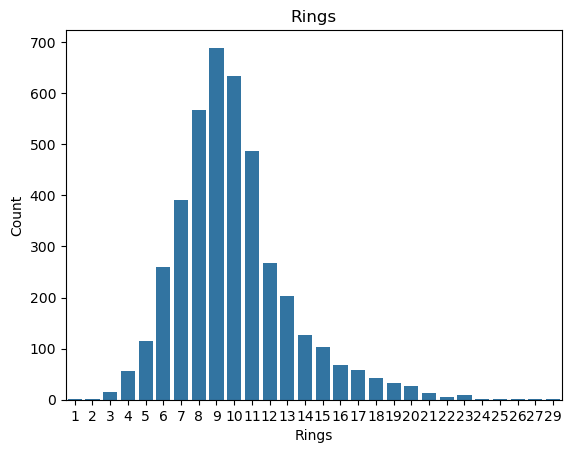

In [15]:
sns.countplot(data= df , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

In [16]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

## => 데이터 불균형 발생 : 전처리 필요

## Rings 값이 4 이하이면 4, 21 이상이면 21로 제한

Text(0.5, 1.0, 'Rings')

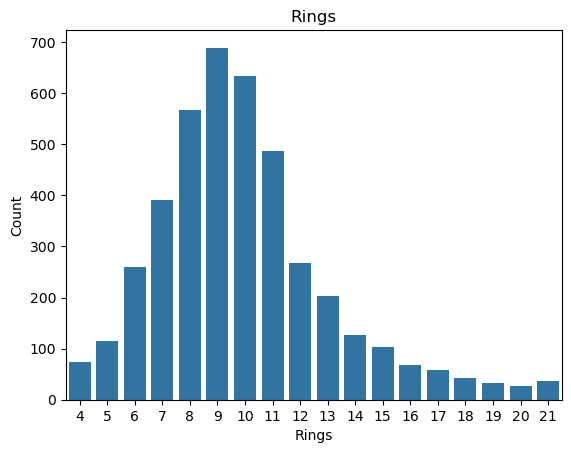

In [17]:
import numpy as np


df['Rings'] = np.clip(df['Rings'], 4, 21)

sns.countplot(data= df , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

## 2. 문자형 데이터 Label Encoding

Text(0.5, 1.0, 'Sex')

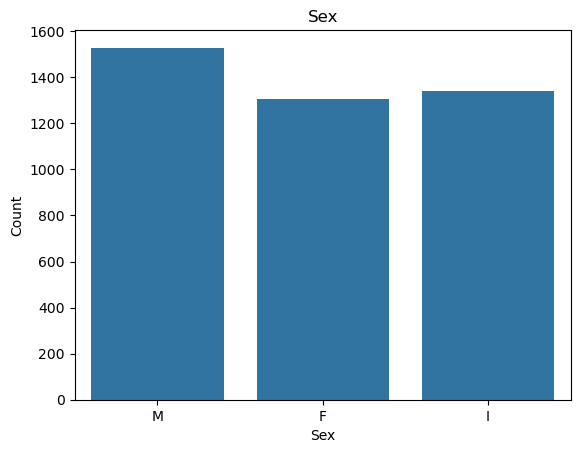

In [18]:
sns.countplot(data= df , x="Sex") 
plt.xlabel("Sex")
plt.ylabel('Count')
plt.title("Sex") 

In [19]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Sex'] = label_encoder.fit_transform(df['Sex'])


Text(0.5, 1.0, 'Sex')

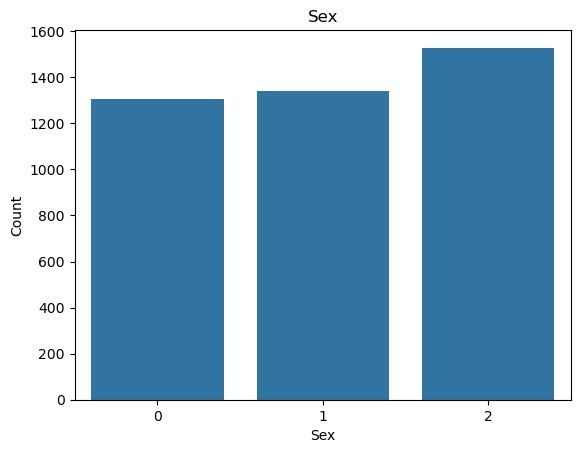

In [20]:
sns.countplot(data= df , x="Sex") 
plt.xlabel("Sex")
plt.ylabel('Count')
plt.title("Sex") 

## 3. 결측치 확인 및 제거하기 

In [21]:
# 결측치 확인. 결측치란 : 데이터에 값이 없는 것.(Null), 속성값 0 => 결측치 없음 
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [22]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

<span style="font-size:40px">== 딥러닝 분류 모델 생성 ==</span>

## 1. 레이블 분류

In [23]:
# 레이블 제거한 데이터 

X = df.drop('Rings', axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [25]:
# Y => 레이블, 분류 => 4부터 21까지 => 18개 

y = df['Rings']
y.value_counts().sort_index()

Rings
4      74
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     36
Name: count, dtype: int64

## 2. 데이터 분할(Train/Test Split)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## 3. 레이블 원-핫 인코딩 

In [27]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train - 4)  # 4부터 시작하도록 조정
y_test = to_categorical(y_test - 4)

print(y_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


## 4. 모델 구축 

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(18, activation='softmax')  # 클래스 수가 4~21이므로 총 18개 클래스
])


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## 5. 모델 컴파일

In [29]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## 6. 모델 학습

In [30]:
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.1399 - loss: 2.7244 - val_accuracy: 0.2362 - val_loss: 2.3541
Epoch 2/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.1788 - loss: 2.4431 - val_accuracy: 0.2362 - val_loss: 2.2540
Epoch 3/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2121 - loss: 2.3449 - val_accuracy: 0.2182 - val_loss: 2.1935
Epoch 4/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.1965 - loss: 2.2831 - val_accuracy: 0.2481 - val_loss: 2.1588
Epoch 5/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2290 - loss: 2.2579 - val_accuracy: 0.2392 - val_loss: 2.1225
Epoch 6/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2207 - loss: 2.2129 - val_accuracy: 0.2422 - val_loss: 2.1137
Epoch 7/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.2226 - loss: 2.2172 - val_accuracy: 0.2392 - val_loss: 2.0920
Epoch 8/100
84/84 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.2430 - loss: 2.1602 - val_accuracy: 0.2362 - v

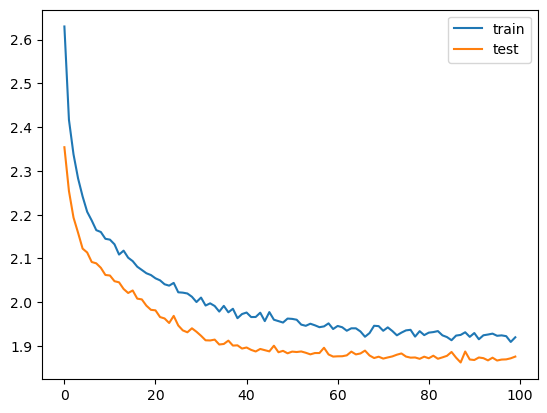

In [31]:
plt.plot(history.history["loss"], label = "train")
plt.plot(history.history["val_loss"], label = "test")
plt.legend()

## 7. 모델 평가 

In [32]:
model.evaluate(X_train, y_train)

105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.2985 - loss: 1.8744


[1.8720186948776245, 0.284944623708725]

In [33]:
model.evaluate(X_test, y_test)

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3039 - loss: 1.8983 


[1.8996185064315796, 0.30622008442878723]

### 혼동 행렬 및 히트맵 그리기 

27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Confusion Matrix


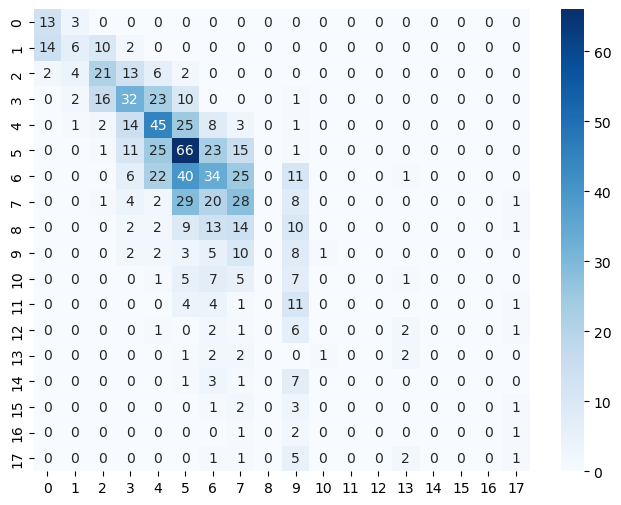

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# 원 핫 인코딩 => 정수형 레이블 변환 
y_test_arg=np.argmax(y_test, axis=1)
Y_pred = np.argmax(model.predict(X_test),axis=1) # => 예측값 
print('Confusion Matrix')
cm = confusion_matrix(y_test_arg, Y_pred)
# 시각화
plt.figure(figsize=(8, 6))  # 그래프 크기 조절 (너비 8, 높이 6)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")

# 그래프 표시
plt.show()

## => test 데이터 10~17부분이 거의 없음. 또한 레이블별 데이터가 너무 적기 때문에 정확도 낮다고 판단 => K겹 교차 검증 수행

<span style="font-size:40px">== K겹 교차 검증 수행 모델 ==</span>

## 1. 데이터 준비

In [42]:
# 레이블 제거한 데이터 

X = df.drop('Rings', axis=1)
X.head()


,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [43]:
y = df['Rings']
y_encoded = to_categorical(y-4) # => 원 핫 인코딩으로 변환 

# DataFrame으로 변환하여 클래스별로 보기 좋게 출력
y_df = pd.DataFrame(y_encoded, columns=[f'Class_{i}' for i in range(y_encoded.shape[1])])

# 원본 y와 원-핫 인코딩 결과 결합
result = pd.concat([y.reset_index(drop=True), y_df], axis=1)

# 결과 출력
print(result.head())  # 상위 5개 행 출력


   Rings  Class_0  Class_1  Class_2  Class_3  Class_4  Class_5  Class_6  \
0     15      0.0      0.0      0.0      0.0      0.0      0.0      0.0   
1      7      0.0      0.0      0.0      1.0      0.0      0.0      0.0   
2      9      0.0      0.0      0.0      0.0      0.0      1.0      0.0   
3     10      0.0      0.0      0.0      0.0      0.0      0.0      1.0   
4      7      0.0      0.0      0.0      1.0      0.0      0.0      0.0   

   Class_7  Class_8  Class_9  Class_10  Class_11  Class_12  Class_13  \
0      0.0      0.0      0.0       0.0       1.0       0.0       0.0   
1      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
2      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
3      0.0      0.0      0.0       0.0       0.0       0.0       0.0   
4      0.0      0.0      0.0       0.0       0.0       0.0       0.0   

   Class_14  Class_15  Class_16  Class_17  
0       0.0       0.0       0.0       0.0  
1       0.0       0.0       

In [ ]:
y = y_encoded

## 2.  Keras 모델을 sc ikit-learn과 호환되도록 래핑

In [63]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))  # 입력 특성 수에 맞게 조정
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(18, activation='softmax'))  # 클래스 수에 맞게 조정
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=-1)
        return np.mean(y_pred == y_true)## 3. 모델 생성

## 3. 교차 검증 수행

In [64]:
model_K = KerasClassifier()

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model_K, X, y, cv=kf)


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


## 4. 결과 출력 

In [65]:
print("각 폴드의 정확도:", scores)
print("평균 정확도:", np.mean(scores))

각 폴드의 정확도: [0.28827751 0.27990431 0.26347305 0.2491018  0.2754491 ]
평균 정확도: 0.2712411540555253


# K-겹 교차 검증을 했음에도 현저히 낮은 수치 => 각 레이블 별 데이터 값이 너무 낮기 때문이라고 판단함.

<span style="font-size:40px">== Rings(레이블)값 범주화 ==</span>

In [79]:
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


## Rings 값 5단위로 범주화하기

In [83]:
import pandas as pd

df_c = df

bins = [0, 5, 10, 15, 20,30]  # 구간 설정
labels = [0,1,2,3,4]
df_c['Rings'] = pd.cut(df_c['Rings'], bins=bins, labels=labels).astype(int)

Text(0.5, 1.0, 'Rings')

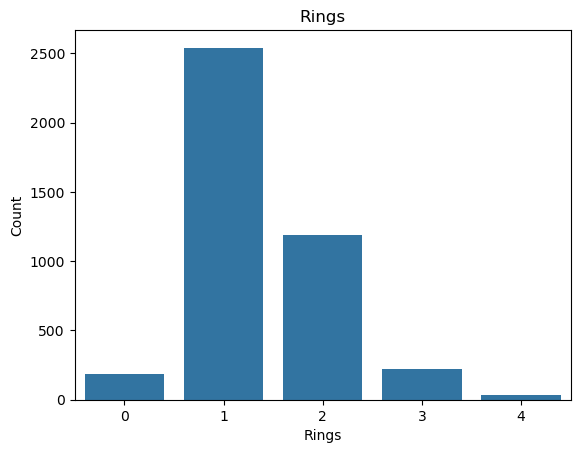

In [84]:
sns.countplot(data= df_c , x="Rings") 
plt.xlabel("Rings")
plt.ylabel('Count')
plt.title("Rings") 

## Sex 문자값을 정수형으로 변환

In [87]:
from sklearn.preprocessing import LabelEncoder

# 문자열 => 정수값(0~2)로 변환 
label_encoder = LabelEncoder()
df_c['Sex'] = label_encoder.fit_transform(df_c['Sex'])

In [88]:
print(df_c['Sex'].head())

id
0    2
1    2
2    0
3    2
4    1
Name: Sex, dtype: int64


## 1. 훈련 데이터 준비 

In [101]:
X = df.drop('Rings', axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [111]:
y = df_c['Rings']
y = to_categorical(y)
print(y)

[[0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 ...
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]


## 2. 교차 검증 준비 

In [112]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import KFold, cross_val_score
from sklearn.base import BaseEstimator, ClassifierMixin
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

class KerasClassifier(BaseEstimator, ClassifierMixin):
    def __init__(self):
        self.model = None

    def build_model(self):
        model = Sequential()
        model.add(Dense(64, activation='relu', input_shape=(X.shape[1],)))  # 입력 특성 수에 맞게 조정
        model.add(Dropout(0.2))
        model.add(Dense(32, activation='relu'))
        model.add(Dropout(0.2))
        model.add(Dense(5, activation='softmax'))  # 클래스 수에 맞게 조정
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        return model

    def fit(self, X, y):
        self.model = self.build_model()
        self.model.fit(X, y, epochs=20, batch_size=32, verbose=0)
        return self

    def predict(self, X):
        return np.argmax(self.model.predict(X), axis=-1)

    def score(self, X, y):
        y_pred = self.predict(X)
        y_true = np.argmax(y, axis=-1)
        return np.mean(y_pred == y_true)## 3. 모델 생성

## 3. 교차 검증 수행

In [120]:
model_C = KerasClassifier()

# KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)

scores = cross_val_score(model_C, X, y, cv=kf)

C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


C:\Users\tansy\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


27/27 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


## 모델 평가 

In [122]:
print(np.mean(scores))

0.6914070423745808


## 30프로의 정확도 => 68.9프로로 정확도 향상

# 모델 저장 

In [123]:
model_file = 'C:/Users/tansy/Ai/Model_C.keras'
tf.keras.models.save_model(model_C.model, model_file, include_optimizer=False)
print('Model saved at', model_file)

Model saved at C:/Users/tansy/Ai/Model_C.keras


<span style="font-size:40px">== 사전 훈련 및 미세 조정 ==</span> 

AttributeError: 'KerasClassifier' object has no attribute 'summary'